In [31]:
# Convolutional Neural Network
# Importing the libraries
import tensorflow as tf
# The module that will help us to do the image preprocessing
from keras_preprocessing.image import ImageDataGenerator

#Importing matplotlib to see the images 
import matplotlib.pyplot as plt
%matplotlib inline
import os
from matplotlib.figure import Figure
from keras_preprocessing import image 
import cv2

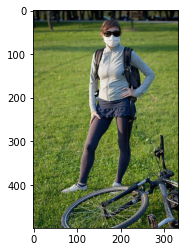

In [76]:
#Looking at one of our images 
img = image.load_img('Dataset/training_set/Mask/aadawlxbmapqrblgxyzarhjasgiobu.png')
plt.imshow(img)

In [77]:
#seeing the shape of our image
cv2.imread('Dataset/training_set/Mask/aadawlxbmapqrblgxyzarhjasgiobu.png').shape

(499, 333, 3)

In [159]:
# Preprocessing the training set
# We are going to transofrmations on all the images of the training set only the reason is 
# because we are trying to avoid overfitting, because if we do not we will get high accuracies in
# the training set and the test set, these transformations are simple geometrical transformation
#like trans vections to shift some of the pixels, and also rotate the images such as some horizontal
#shifts or zooms the techinical term is image augmentation
# the rescale will apply feature scaling on the pixels by dividing 1 by 255 because pixels take values between 0-255
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
# connecting the train_datagen to our training set
# the method from the class train_datagen, flow_from_directory will connect the 
# image augmentation tool to the training set 
# the traget size is the final size of your image as their fed into your CNN
# batch size is how many images you want in each batch
# class mode which is either binary or categorical and since we have a binary outcome we will choose it 
training_set = train_datagen.flow_from_directory(
        'Dataset/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

# Preprocessing the Test set
# we have to have the same scale as the training set 
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'Dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')




Found 60 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [160]:
# BUILDING THE CNN
# Intitalsing the cnn to get many layers in the cnn
cnn = tf.keras.models.Sequential()
# Convolution 
# The three important parameters to input in the conv3d is filters which is the
# number of feature dectoctors which you want to apply to apply to your images
# We also specify the kernel size is the size of the feature detector so if we choose 3 the size will be 3 by 3
# we will also take the activation function relu to reduce linearity of the images
#we will also specify the input shape, will be 64, 64, 3 because we have colored images to match the RGB to also match the target size if our image
# if it was not colored it would be 64,64,1
# the input shape parameter is only added when you are doing your first layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64,64,3]))

# Pooling
# we will apply max pooling
# the pool size is the sliding in the layers
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))
# Adding the second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2))

# Flattening the result of the convultions and pooling into a 1-d vector
# which will be come the input of a fully connected CNN
cnn.add(tf.keras.layers.Flatten())

# Full Connection
# We are using a bigger number of neurons because our dataset is large 
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# The output layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN
# Compiling the cnn
# we are choosing the adam optimizer to perfom stochastic gradient descent in-order to adjust the weights
# and reduce the loss error between the predictions and the target
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the cnn on the training set and evaluating it on the test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 [==============================] - 2s 632ms/step - loss: 0.6817 - accuracy: 0.5333 - val_loss: 0.9004 - val_accuracy: 0.5000
Epoch 2/25
2/2 [==============================] - 1s 862ms/step - loss: 0.7834 - accuracy: 0.5833 - val_loss: 0.7325 - val_accuracy: 0.4000
Epoch 3/25
2/2 [==============================] - 1s 777ms/step - loss: 0.7111 - accuracy: 0.5167 - val_loss: 0.8130 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 1s 400ms/step - loss: 0.6634 - accuracy: 0.5667 - val_loss: 0.7033 - val_accuracy: 0.4000
Epoch 5/25
2/2 [==============================] - 1s 778ms/step - loss: 0.6372 - accuracy: 0.6000 - val_loss: 0.7139 - val_accuracy: 0.5000
Epoch 6/25
2/2 [==============================] - 1s 758ms/step - loss: 0.6451 - accuracy: 0.5667 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 7/25
2/2 [==============================] - 1s 415ms/step - loss: 0.6051 - accuracy: 0.7667 - val_loss: 0.7089 - val_accuracy: 0.5000
Epoch 8/25
2/2 [====

In [161]:
# Making a single preditction
# the size of the image has to be the same 
import numpy as np
from keras_preprocessing import image
test_image = image.load_img('Dataset/Validate/P1.jpg', 
                            target_size=[64, 64])
# we have to change the test image into an 2-d array because the predict method excepts a 2-d array
test_image = image.img_to_array(test_image)
# Adding an extra dimension which will correspond to the batch and will contain that image into
# a batch, the axis =0  is the first dimension
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
# doing encoding to figure out which is the dog and cat from 1 or 0 by using indices
index = training_set.class_indices
# result still has the batch so we use [] to get access to the batch, 
# we have to acess the batch and then the single element of the batch in-order to get a prediction
if result == 1:
    prediction = 'No Mask'
else:
    prediction = 'Mask'
print(prediction)
print(index)

No Mask
{'Mask': 0, 'No_Mask': 1}


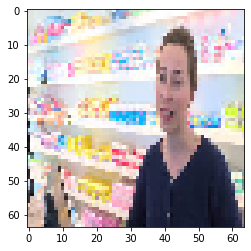

No Mask


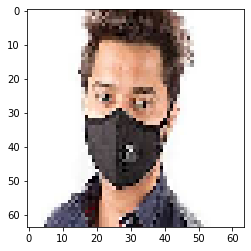

Mask


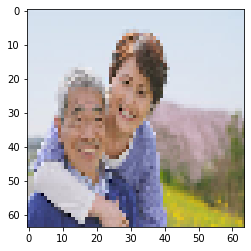

No Mask


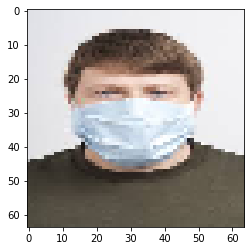

No Mask


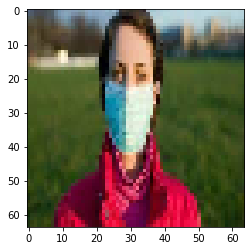

Mask


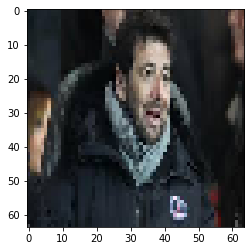

Mask


In [173]:
dir_path = 'Dataset/Validate'


for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+'//' + i, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    
    # we have to change the test image into an 2-d array because the predict method excepts a 2-d array
    img = image.img_to_array(img)
    # Adding an extra dimension which will correspond to the batch and will contain that image into
    # a batch, the axis =0  is the first dimension
    img = np.expand_dims(img, axis=0)
    result = cnn.predict(img)
    # doing encoding to figure out which is the dog and cat from 1 or 0 by using indices
    index = training_set.class_indices
    # result still has the batch so we use [] to get access to the batch, 
    # we have to acess the batch and then the single element of the batch in-order to get a prediction
    if result == 1:
        prediction = 'No Mask'
    else:
        prediction = 'Mask'
    print(prediction)
